In [7]:
# logistic regression을 그림으로 알아보아요


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings 
#경고메세지 안뜨게 하기 위함
from sklearn.linear_model import LogisticRegression
import mglearn 
# mglearn은 처음 사용하는 것으로 설치 해야 가능
# 데이터 셋을 제공해줌

warnings.filterwarnings(action="ignore")
# warning 출력 배제 action

(26, 2)

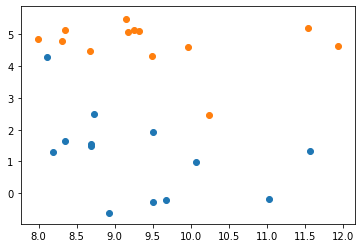

In [25]:
# 데이터 셋 불러오기


x, y = mglearn.datasets.make_forge()

# 먼저 간단하게 scatter 산점도를 그려보아요
# y값이 0인 x를 추출해서 x의 첫번째 컬럼을 x축으로,
# x의 두번째 컬럼은 y축으로 scatter를 그려보아요
# 마스크 사용

Blue = x[y==0]
plt.scatter(Blue[:,0], Blue[:,1])

Orange = x[y==1]
plt.scatter(Orange[:,0], Orange[:,1])



cost 값은: 7.670059680938721
cost 값은: 0.3212696611881256
cost 값은: 0.2715955376625061
cost 값은: 0.26020848751068115
cost 값은: 0.2560076415538788
cost 값은: 0.25400254130363464
cost 값은: 0.2528211176395416
cost 값은: 0.2519853413105011
cost 값은: 0.2513054609298706
cost 값은: 0.2506997287273407
[1]


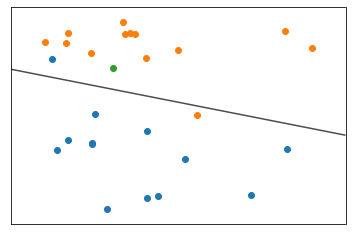

In [38]:
# machine learning(logistic regression
# train data set(test data set은 넘어간다.)
train_x_data = x

# train_y_data = y
# shape이 다르기 때문에 맞춰줘야 함 (1차 배열)
# 행은 몇개가 되어도 상관이 없고 열은 1열, 총 2차 배열로 reshape
train_y_data = y.reshape([-1,1])

# placeholder
X = tf.placeholder(shape=[None, 2], dtype=tf.float32)
Y = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# Weight, bias
W = tf.Variable(tf.random_normal([2,1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis
logit = tf.matmul(X,W) + b
H = tf.sigmoid(logit)

# cost
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = logit,
                                                              labels = Y))

# train
# optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)
# train = optimizer.minimizer(cost)
train = tf.train.GradientDescentOptimizer(learning_rate = 0.01).minimize(cost)

# session, 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습진행
for step in range(3000):
    _, cost_val = sess.run([train, cost], feed_dict = {X: train_x_data,
                                                      Y: train_y_data})
    if step % 300 == 0:
        print(f'cost 값은: {cost_val}')

        
# 정확도 측정(Accuracy): 95%이상 나오면 쓸만한 모델
# prediction(예측)
result = sess.run(H, feed_dict={X: [[9,4]]})
result
# array([[0.8272993]], dtype=float32)
# 1에 가까움


# 이 또한 sctter로 찍어볼 것
Blue = x[y==0]
plt.scatter(Blue[:,0], Blue[:,1])

Orange = x[y==1]
plt.scatter(Orange[:,0], Orange[:,1])

plt.scatter(9,4)
# 1의 분포에 가까움
# logistic은 어떤 분포에 가까운지를 보는것 


# sklearn 제공 logistic regression 학습 및 예측
model = LogisticRegression()
myModel = model.fit(x,y) #logistic model 학습
print(myModel.predict([[9,4]])) #1
# 이는 바로 1 값을 예측해준다.

# 이 모델을 이용해서 그림을 그릴 수 있음
mglearn.plots.plot_2d_separator(myModel, x, fill=False,
                               eps = 0.5, alpha = 0.7)
# model을 x 데이터를 이용해서 그림, alpha 값은 투명도, eps는 스케일 크기 잡는 것
# 선보다
# linear은 데이터를 가장 잘 설명하는 선을 만드는 것
# logistic은 두 개의 분류를 가로지르는 적절한 선을 구하는 것
# 군집을 가로지르는 경계를 구하는 것, 이를 통해 예측하고자 하는데이터가 어느 쪽인지를 통해 예측
# x가 2개라서 2치원으로 표현되었고, 3개면 3차원으로 표현되고 선이 아닌 면을 구할 것
# hypho plan을 구하는 것이 logistic의 목적

# 그런데 파란색, 노란색 예외가 있기는 함!
# 과적합: 예외 없이 딱 맞는 hypho plan: 오히려 실데이터 넣으면 부정적 결과 나옴

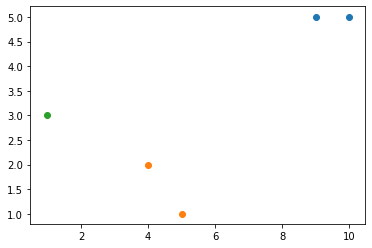

In [40]:
# logistic을 multinomial로 작성해보아요

# X 데이터: 중간고사 성적과 기말고사 성적이 들어갈 것
# Y 데이터: 학점

x = np.array([[10,5],
            [9,5],
            [5,1],
            [4,2],
            [1,3]])
y = np.array([['A'],
              ['A'],
              ['B'],
              ['B'],
              ['C']])

# x의 0,1행이랑 0열 그리고 0,1행이랑 1열: A 학점
plt.scatter(x[0:2,0], x[0:2,1]) #A학점 파란색
plt.scatter(x[2:4,0], x[2:4,1]) #B학점 주황색
plt.scatter(x[4,0], x[4,1]) #C학점 초록색

# logistic에서의 H
# H=tf.sigmoid(tf.matmul(x,w)+b)

In [10]:
# 퀴즈 데이터

import tensorflow as tf

# train data set 
train_x_data = [[10,7,8,5],
               [8,8,9,4],
               [7,8,2,3],
               [6,3,9,3],
               [7,5,7,4],
               [3,5,6,2],
               [2,4,3,1]]

# y data를 one hot encoding 형태로 바꿔서 써야 함
train_y_data = [[1,0,0],
               [1,0,0],
               [0,1,0],
               [0,1,0],
               [0,1,0],
               [0,0,1],
               [0,0,1]]


# palceolder
X = tf.placeholder(shape=[None, 4], dtype=tf.float32)
Y = tf.placeholder(shape=[None, 3], dtype=tf.float32)


# weight, bias
# 총 12개의 W를 구하고, 매트릭스 형태로 구함
# 총 3개의 bias를 구함
W = tf.Variable(tf.random_normal([4,3]), name='weight')
b = tf.Variable(tf.random_normal([3]), name='bias')


# Hypothesis
logit = tf.matmul(X,W) + b
# sigmoid 사용하면 각각의 확률이 나옴
# 전체의 확률을 구하기 위해서 softmax 사용
H = tf.nn.softmax(logit) #변경 유의!!


# cost
# H를 가지고 cost를 만듦, 따라서 H가 변경이 되면 cost 또한 변경
# tt.nn.softmax_cross_entropy_with_logits_v2 사용!
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(
                     logits = logit,
                     labels = Y))


# session, 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# train
train = tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(cost)

# 학습
for step in range(3000):
    _, val_cost = sess.run([train,cost], feed_dict = {X: train_x_data,
                                                     Y: train_y_data})
    if step % 300 == 0:
        print(f'cost값은 : {val_cost}')
        
        
# accuracy정확도
# 이전에 했던 logistic정확도 측정은 다음과 같음, 확률로 나오는 것을 1, 0으로 바꿔줌
# predict = tf.cast(H > 0.5, dtype=tf.float32)
# 그런데 지금 H는 3개가 나옴: logistic 3개

# sess.run(H, feed_dict={X:[[10,8,9,0]]}) : 값이 1행 3열로 나옴
# 이 합은 1, 이 중 가장 큰 값을 찾아야 함
predict = tf.argmax(H, axis=1) #가장 큰 값의 index번호를 리턴
correct = tf.equal(predict, tf.argmax(Y, axis=1)) #기징 큰 h값이 위치한 것을 가지고 비교
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print(f'정확도: {sess.run(accuracy, feed_dict={X: train_x_data, Y: train_y_data})}')
# 같은 데이터로 하였기에 정학도가 1로떨어짐


cost값은 : 2.57488751411438
cost값은 : 1.0543771982192993
cost값은 : 0.7914150953292847
cost값은 : 0.5894469618797302
cost값은 : 0.5170459151268005
cost값은 : 0.48012036085128784
cost값은 : 0.055457137525081635
cost값은 : 0.049413084983825684
cost값은 : 0.04531131312251091
cost값은 : 0.04212411120533943
정확도: 1.0
